# <center> Bootstrap TP1
<b>Antoine GRELETY</b>
<b>Vincent LE MEUR</b>

## Importation des librairies et des données

In [1]:
import numpy as np
import numpy.random as npr
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import math

In [3]:
#law=pd.read_csv("/Users/antoinegrelety/Documents/ENSAE/S2_Bootstrap/TP1/lsat.dat")
law=pd.read_table("lsat.dat",sep=" ")

In [4]:
law.head()

,LSAT,GPA
0,576,3.39
1,635,3.30
2,558,2.81
3,578,3.03
4,666,3.44


In [7]:
n=law.shape[0]

In [8]:
LSAT=np.array(law["LSAT"])
GPA=np.array(law["GPA"])

In [11]:
law=np.array(law)

## Partie 1 :  Estimateurs bootstrap

### Estimateur bootstrap de la variance de la corrélation

In [11]:
B=200
corr_star=np.zeros(B)
for b in range(B):
    ind=npr.randint(0,n,15)
    sample_b=law[ind,:]
    corr_star[b]=np.corrcoef(LSAT[ind],GPA[ind])[0,1]
    #print(corr_star[b])

In [12]:
print("estimateur bootstrap:",np.var(corr_star))

estimateur bootstrap: 0.0244937678257


### Médiane

In [27]:
Z_size=[10,100,1000,10000,10]

B=10000
i=0
for c in Z_size:
    i=i+1
    Z=npr.exponential(size=c)
    med_star=np.zeros(B)
    med=np.zeros(B)
    for b in range(B):
        ind=npr.randint(0,len(Z),len(Z))
        sample_b=Z[ind]
        med_star[b]=np.median(sample_b)
    if i<=4:     # Cette condition nous sert à garder en mémoire la valeur pour n=10 (qui sera utilisée après)
        print("Variance de la médiane :",np.var(med_star))
        
    

Variance de la médiane : 0.04139059047273733
Variance de la médiane : 0.007676040829839106
Variance de la médiane : 0.0010224246108551528
Variance de la médiane : 0.00011961208371894949


On constate que la variance de la médiane tend vers 0 ce qui correspond à la valeur limite.

### Estimation de la fonction de répartition

In [21]:
Z=npr.exponential(size=10)
med_Z=np.median(Z)

Fonction de répartition de la médiane empirique approché par Monte Carlo

In [22]:
M=10000
med_MC=np.zeros(M)
for m in range(M):
        Z=npr.exponential(size=10)
        med_MC[m]=np.median(Z)
print("médiane via MC:",np.mean(med_MC))

médiane via MC: 0.7472746647991707


Comparaison des fonctions de répartition de l'approximation asymptotique gaussienne, celle approchée par Monte Carlo et celle obtenue par estimateurs boostrapés :

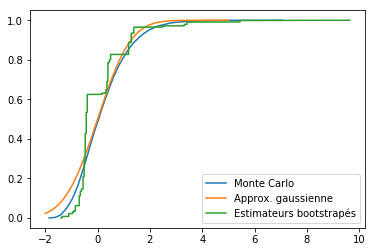

In [26]:
plt.plot(np.sqrt(len(Z))*(np.sort(med_MC)-np.log(2)),(1/M)*np.arange(M))
gridnorm=np.arange(-2,5,0.01)
plt.plot(gridnorm,norm.cdf(gridnorm))
plt.plot(np.sqrt(len(Z))*(np.sort(med_star)-med_Z),(1/B)*np.arange(B))
plt.legend(["Monte Carlo","Approx. gaussienne","Estimateurs bootstrapés"])
plt.show()

La fonction de répartition obtenue par estimateurs boostrapés oscille autour de celle obtenue par approximation Gaussienne. En comparaison, la méthode de Monte Carlo semble ici plus précise pour cette estimation.

On vérifie ici la convergence en loi de la médiane obtenue par boostrap vers une loi normale.

## Partie 2: intervalles de confiance

On définit ci-dessous les paramètres :

In [32]:
n=10
p=0.7
theta=0.007
q=1
kappa=0.02
alpha=0.05
tau=(p*kappa)/(q*theta)

On définit nos deux échantillons de taille n :

In [33]:
X=npr.gamma(p,1/theta,size=n)
Y=npr.gamma(q,1/kappa,size=n)

In [34]:
def tau_hat(x,y):
    return(np.mean(x)/np.mean(y))

## Intervalle de confiance par approximation normale :

LOI LIMITE A REDIGER

$$IC_{\text{AN}}(\alpha)=\left[\hat{\tau} -
\frac{\hat{\sigma}}{\sqrt n} \Phi^{-1} (1-\alpha/2);\hat{\tau}+
\frac{\hat{\sigma}}{\sqrt n} \Phi^{-1} (1-\alpha/2)\right]
$$

où $$\hat{\sigma}=\sqrt{\frac{\frac{1}{n} \sum_{i=1}^n (X_i
-\bar{X}_n)^2 }{\bar{Y}_n^2}+\frac{\bar{X}_n^2}{\bar{Y}_n^4}
\frac{1}{n} \sum_{i=1}^n (Y_i -\bar{Y}_n)^2}.$$

## Intervalle de confiance par Boostrap :

### IC par bootstrap

Construction de l'intervalle de confiance par approximation normale :

In [35]:
def sigma_hat(x,y):
    return  np.sqrt( np.var(x)/(np.mean(y**2)) + (np.mean(x**2)/np.mean(y**4))*np.var(y) )

In [36]:
def ICAN(alpha,X,Y):
    A= []
    A.append(tau_hat(X,Y)-sigma_hat(X,Y)/np.sqrt(n)*norm.ppf(1-alpha/2))
    A.append(tau_hat(X,Y)+sigma_hat(X,Y)/np.sqrt(n)*norm.ppf(1-alpha/2))
    return A

In [38]:
print("Intervalle de confiance à un niveau alpha = 5% d'une approximation normale : ",ICAN(alpha,X,Y))
print("Valeur de l'estimation : ",tau_hat(X,Y))

Intervalle de confiance à un niveau alpha = 5% d'une approximation normale :  [0.5169867792444685, 2.997655722437388]
Valeur de l'estimation :  1.7573212508409284


On estime le paramètre $\hat{\tau}$, par Boostrap ci-dessous. On stocke les différentes valeurs dans le vecteur "tau_star" : 

In [39]:
#Bootstrap
B=1000
tau_star=np.zeros(B)
S_star=np.zeros(B)
tau_hat_val=tau_hat(X,Y)
for b in range(B):
    ind=npr.randint(0,n,n)
    sample_X=X[ind]
    sample_Y=Y[ind]
    tau_star[b]=tau_hat(sample_X,sample_Y)
    var_hat=np.var(sample_X/np.sqrt(np.var(sample_X)/np.mean(sample_Y)**2+
                                    np.mean(sample_X)*np.var(sample_Y)/np.mean(sample_Y)**4) )
    S_star[b]=np.sqrt(n)*(tau_star[b]-tau_hat_val)/np.sqrt(var_hat)

#ordonne les paramètres estimés
tau_star=np.sort(tau_star)
S_star=np.sort(S_star)

On définit ci-dessous notre intevalle de confiance du boostrap basique ("IC_base") :

In [27]:
def IC_base(alpha,x,y,theta):
    A= []
    A.append( 2*tau_hat(x,y)-theta[math.ceil(len(theta)*(1-alpha/2))] )
    A.append( 2*tau_hat(x,y)-theta[math.ceil(len(theta)*(alpha/2))] )
    return(A)

In [28]:
print("Intervalle de confiance de base:",IC_base(alpha,X,Y,tau_star))

Intervalle de confiance de base: [-0.058170384743096992, 2.3548816046470193]


On définit ci-dessous notre intervalle de confiance du percentile : 

In [43]:
def IC_perc(alpha,x,y,theta):
    A= []
    A.append( theta[math.ceil(len(theta)*(alpha/2))] )
    A.append( theta[math.ceil(len(theta)*(1-alpha/2))] )
    return(A)

In [44]:
print("Intervalle de confiance percentile:",IC_perc(alpha,X,Y,tau_star))

Intervalle de confiance percentile: [0.3304306780882762, 6.671667403136379]


On définit enfin, l'intervalle de confiance du t-boostrap :

In [31]:
def IC_t_boot(alpha,x,y,theta):
    A= []
    sigma_F=np.sqrt( np.var(x/np.sqrt(np.var(x)/np.mean(y)**2+
                                    np.mean(x)*np.var(y)/np.mean(y)**4) ) )
    
    A.append( tau_hat(x,y) - sigma_F*theta[math.ceil(len(theta)*(1-alpha/2))]/np.sqrt(n) )
    A.append( tau_hat(x,y) - sigma_F*theta[math.ceil(len(theta)*(alpha/2))]/np.sqrt(n)  )
    return(A)

In [32]:
print("Intervalle de confiance t-bootstrap:",IC_t_boot(alpha,X,Y,S_star))

Intervalle de confiance t-bootstrap: [-1.0763900863169076, 2.2809305386100505]


### Comparaison des IC

In [45]:
def bornes_sup_inf():
    IC1=[]
    IC2=[]
    IC3=[]
    for b in range(B):
        IC1.append( IC_base(alpha,X,Y,tau_star) )
        IC2.append( IC_perc(alpha,X,Y,tau_star) )
        IC3.append( IC_t_boot(alpha,X,Y,S_star) )
    return([,])

SyntaxError: invalid syntax (<ipython-input-45-99552fa883bd>, line 9)

In [ ]:
#Monte Carlo M=1000
for m in range(M):
    

### Tests par bootstrap

On teste: $H_{0}: \tau=2$

* Niveaux de tests par IC

In [38]:
#H_0: tau=2
#calculons les p-value pour chaque IC
def p_value(x,y,theta_0,S_star):
    theta_hat=tau_hat(x,y)
    sigma_F=np.sqrt( np.var(x/np.sqrt(np.var(x)/np.mean(y)**2+
                                    np.mean(x)*np.var(y)/np.mean(y)**4) ) )
    S_bar=np.sqrt(n)*(theta_hat-theta_0)/sigma_F
    return( ( len(S_star[S_star > S_bar])+1 ) / (B+1) )

In [40]:
theta_0=2
p_value=p_value(X,Y,theta_0,S_star)
print(p_value)

0.8551448551448552


In [41]:
print("Intervalle de confiance de base avec p-value:",IC_base(1-p_value,X,Y,tau_star))

Intervalle de confiance de base avec p-value: [0.48103713803012793, 2.1934354574907964]


In [42]:
print("Intervalle de confiance percentile avec p-value:",IC_perc(1-p_value,X,Y,tau_star))

Intervalle de confiance percentile avec p-value: [0.95102036607293128, 2.6634186855335997]


In [43]:
print("Intervalle de confiance t-bootstrap avec p-value:",IC_t_boot(1-p_value,X,Y,S_star))

Intervalle de confiance t-bootstrap avec p-value: [0.010347885580748617, 2.1235204280505626]


* Puissance des tests $H_{1}: \tau=3$

In [44]:
p=0.7
theta=0.007
q=1
kappa=0.03
alpha=0.05

In [ ]:
#puissance = proba que H_0 soit rejeté et que H_0 soit faux (vrai négatif) = 1 -  beta
#Pour chaque type d'interval, calcul des quantiles sur loi gamma ?
